In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [9]:
#load folder data
import os
path =os.listdir('Documents/Braintumor/Training/')
classes={'no_tumor': 0, 'pituitary_tumor':1, 'meningioma_tumor':2, 'glioma_tumor':3}

In [10]:
import cv2
X = []
Y = []
for cls in classes:
    pth='Documents/Braintumor/Training/'+cls
    for j in os.listdir(pth):
        img = cv2.imread(pth+'/'+j,0)
        img = cv2.resize(img, (200,200))
        X.append(img)
        Y.append(classes[cls])

In [11]:
np.unique(Y)

array([0, 1, 2, 3])

In [12]:
X = np.array(X)
y = np.array (Y)

In [13]:
pd.Series(Y).value_counts()

1    827
3    826
2    822
0    395
dtype: int64

In [14]:
X.shape

(2870, 200, 200)

In [15]:
#visualize data

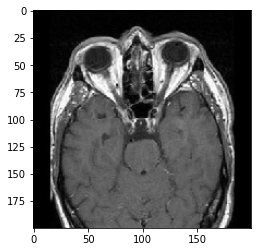

In [17]:
plt.imshow(X[0], cmap='gray')

In [18]:
X_updated = X.reshape(len(X),-1)

In [19]:
X.shape, X_updated.shapelg

((2870, 200, 200), (2870, 40000))

In [20]:
#split data
xtrain, xtest, ytrain, ytest=train_test_split(X_updated, Y, random_state=10,test_size=.20)

In [22]:
xtrain.shape,xtest.shape

((2296, 40000), (574, 40000))

In [23]:
#Feature Scaling
print (xtrain.max(),xtrain.min())
print (xtest.max(),xtest.min())
xtrain=xtrain/255
xtest=xtest/255
print (xtrain.max(),xtrain.min())
print (xtest.max(),xtest.min())

255 0
255 0
1.0 0.0
1.0 0.0


In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [26]:
import warnings
warnings.filterwarnings('ignore')
lg = LogisticRegression (C=0.1)
lg.fit(xtrain, ytrain)

LogisticRegression(C=0.1)

In [27]:
sv=SVC()
sv.fit(xtrain,ytrain)

SVC()

In [28]:
#evaluation
print("training score: ", lg.score(xtrain,ytrain))
print("testing score: ", lg.score(xtest,ytest))


training score:  0.9995644599303136
testing score:  0.7787456445993032


In [29]:
print("training score: ", sv.score(xtrain,ytrain))
print("testing score: ", sv.score(xtest,ytest))


training score:  0.9412020905923345
testing score:  0.8344947735191638


In [30]:
pred = sv.predict(xtest)

In [31]:
misclassified=np.where(ytest!=pred)
misclassified

(array([  9,  14,  15,  17,  19,  26,  30,  32,  37,  42,  45,  65,  75,
         93,  94,  99, 100, 104, 107, 115, 122, 123, 125, 128, 129, 130,
        141, 145, 146, 160, 161, 164, 165, 166, 168, 174, 177, 185, 187,
        189, 201, 203, 217, 218, 222, 223, 228, 240, 242, 249, 254, 256,
        269, 271, 289, 301, 313, 316, 318, 327, 334, 337, 338, 349, 351,
        356, 367, 369, 370, 379, 390, 396, 419, 420, 423, 429, 437, 438,
        441, 448, 453, 457, 470, 474, 477, 478, 493, 501, 512, 522, 526,
        536, 537, 548, 565], dtype=int64),)

In [32]:
#test predict
dec = {0:'no_tumor',1: 'pituitary_tumor',2: 'meningioma_tumor',3: 'glioma_tumor'}

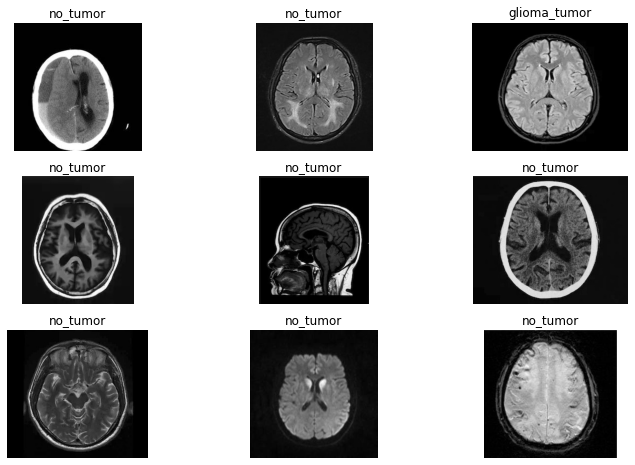

In [33]:
plt.figure(figsize=(12,8))
p = os.listdir('Documents/Braintumor/Testing/')
c=1
for i in os.listdir('Documents/Braintumor/Testing/no_tumor/')[:9]:
    plt.subplot(3,3,c)
    
    img = cv2.imread('Documents/Braintumor/Testing/no_tumor/'+i,0)
    img1 = cv2.resize(img, (200,200))
    img1 = img1.reshape(1,-1)/255
    p = sv.predict(img1)
    plt.title(dec[p[0]])
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    c+=1

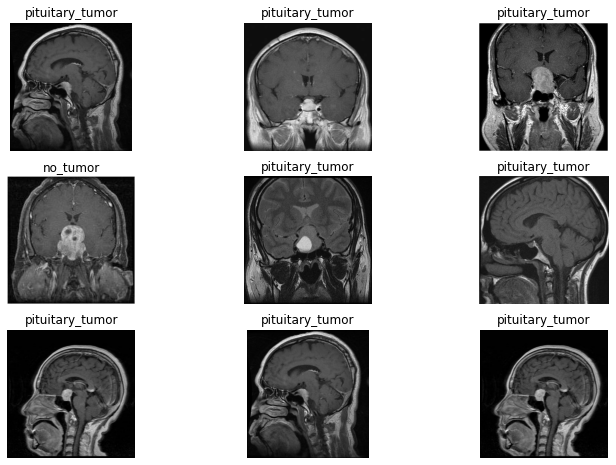

In [34]:
plt.figure(figsize=(12,8))
p = os.listdir('Documents/Braintumor/Testing/')
c=1
for i in os.listdir('Documents/Braintumor/Testing/pituitary_tumor/')[:9]:
    plt.subplot(3,3,c)
    
    img = cv2.imread('Documents/Braintumor/Testing/pituitary_tumor/'+i,0)
    img1 = cv2.resize(img, (200,200))
    img1 = img1.reshape(1,-1)/255
    p = sv.predict(img1)
    plt.title(dec[p[0]])
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    c+=1

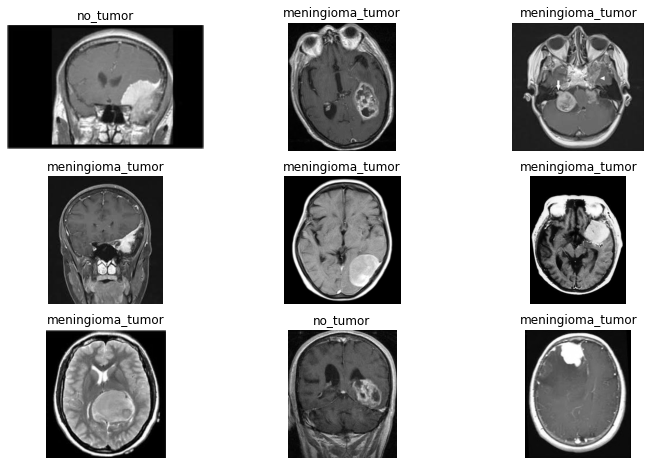

In [35]:
plt.figure(figsize=(12,8))
p = os.listdir('Documents/Braintumor/Testing/')
c=1
for i in os.listdir('Documents/Braintumor/Testing/meningioma_tumor/')[:9]:
    plt.subplot(3,3,c)
    
    img = cv2.imread('Documents/Braintumor/Testing/meningioma_tumor/'+i,0)
    img1 = cv2.resize(img, (200,200))
    img1 = img1.reshape(1,-1)/255
    p = sv.predict(img1)
    plt.title(dec[p[0]])
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    c+=1

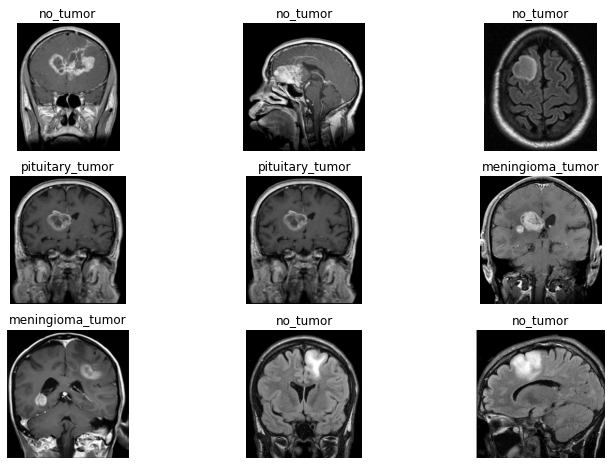

In [37]:
plt.figure(figsize=(12,8))
p = os.listdir('Documents/Braintumor/Testing/')
c=1
for i in os.listdir('Documents/Braintumor/Testing/glioma_tumor/')[:9]:
    plt.subplot(3,3,c)
    
    img = cv2.imread('Documents/Braintumor/Testing/glioma_tumor/'+i,0)
    img1 = cv2.resize(img, (200,200))
    img1 = img1.reshape(1,-1)/255
    p = sv.predict(img1)
    plt.title(dec[p[0]])
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    c+=1